In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
warnings.filterwarnings('ignore')
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from sklearn.naive_bayes import GaussianNB
#from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
warnings.filterwarnings("ignore", category=DeprecationWarning)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already u

In [5]:
data = pd.read_csv('final.csv')

In [6]:
data

,text,resume
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant years experie...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    79 non-null     object
 1   resume  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [8]:
data.isnull().sum()

text      0
resume    0
dtype: int64

In [9]:
data.duplicated().sum()

2

# Checking unnecessary words in the Data

In [10]:
data.resume.str.contains('https://').value_counts() / len(data)

False    1.0
Name: resume, dtype: float64

In [11]:
data.resume.str.contains('@').value_counts() / len(data)

False    1.0
Name: resume, dtype: float64

In [12]:
print('Total Resumes this period:', len(data.index), '\n')

Total Resumes this period: 79 



# Tokenization

In [13]:
from nltk import word_tokenize
tokens = data.resume.map(word_tokenize)

In [14]:
data=[Text.strip() for Text in data.resume] # remove both the leading and the trailing characters
data=[Text for Text in data if Text] # removes empty strings, because they are considered in Python as False
data[0:10]

['anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patch

In [15]:
review_text=' '.join(data)
review_text[:1000]

'anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patche

In [16]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens=tknzr.tokenize(review_text)
print(review_tokens[:100])

['anubhav', 'kumar', 'singh', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'work', 'globally', 'competitive', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'twin', 'benefits', 'job', 'satisfaction', 'steady', 'paced', 'professional', 'growth', 'professional', 'experience', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshore', 'skills', 'shell', 'scripting', 'linux', 'peoplesoft', 'administration', 'github', 'managing', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environments', 'along', 'support', 'environments'

In [17]:
review_tokens_text=' '.join(review_tokens)
review_tokens_text[:1000]

'anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patche

# Remove Punctuation From Text

In [18]:
no_punc_text=review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patche

# Remove URL'S from Text

In [19]:
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh system admin changes tax updates etc troubleshooting various servers like application servers web servers process scheduler servers applying tuxedo weblogic middleware cpu patche

# Apply Tokenization on 100 Words

In [20]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['anubhav', 'kumar', 'singh', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'work', 'globally', 'competitive', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'twin', 'benefits', 'job', 'satisfaction', 'steady', 'paced', 'professional', 'growth', 'professional', 'experience', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshore', 'skills', 'shell', 'scripting', 'linux', 'peoplesoft', 'administration', 'github', 'managing', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environments', 'along', 'support', 'environments'

In [21]:
len(text_tokens)

40279

# Removing Stopwords

In [22]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['anubhav', 'kumar', 'singh', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'work', 'globally', 'competitive', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'twin', 'benefits', 'job', 'satisfaction', 'steady', 'paced', 'professional', 'growth', 'professional', 'experience', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshore', 'skills', 'shell', 'scripting', 'linux', 'peoplesoft', 'administration', 'github', 'managing', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environments', 'along', 'support', 'environments'

In [23]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])

['anubhav', 'kumar', 'singh', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'core', 'competencies', 'scripting', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financials', 'operating', 'system', 'linux', 'windows', 'web', 'app', 'servers', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'work', 'globally', 'competitive', 'environment', 'challenging', 'assignments', 'shall', 'yield', 'twin', 'benefits', 'job', 'satisfaction', 'steady', 'paced', 'professional', 'growth', 'professional', 'experience', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshore', 'skills', 'shell', 'scripting', 'linux', 'peoplesoft', 'administration', 'github', 'managing', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environments', 'along', 'support', 'environments'

# Applying Stemming

In [24]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['anubhav', 'kumar', 'singh', 'core', 'compet', 'script', 'shell', 'script', 'applic', 'peoplesoft', 'hcm', 'financi', 'oper', 'system', 'linux', 'window', 'web', 'app', 'server', 'weblog', 'tuxedo', 'rdbm', 'oracl', 'repositori', 'github', 'core', 'compet', 'script', 'shell', 'script', 'applic', 'peoplesoft', 'hcm', 'financi', 'oper', 'system', 'linux', 'window', 'web', 'app', 'server', 'weblog', 'tuxedo', 'rdbm', 'oracl', 'repositori', 'github', 'work', 'global', 'competit', 'environ', 'challeng', 'assign', 'shall', 'yield', 'twin', 'benefit', 'job', 'satisfact', 'steadi', 'pace', 'profession', 'growth', 'profession', 'experi', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshor', 'skill', 'shell', 'script', 'linux', 'peoplesoft', 'administr', 'github', 'manag', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'product', 'environ', 'along', 'support', 'environ', 'instal', 'linux', 'window', 'involv', 'day', 'day', 'activ', 'project', 'migrat', 'databas', 'refresh']


In [25]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

anubhav kumar singh core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github core competencies scripting shell scripting application peoplesoft hcm financials operating system linux windows web app servers weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignments shall yield twin benefits job satisfaction steady paced professional growth professional experience current hcl current role system admin offshore skills shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environments along support environments installed linux windows involved day day activities project migration database refresh


# Applying Lemmatization

In [26]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:100])

['anubhav', 'kumar', 'singh', 'core', 'competency', 'script', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financial', 'operate', 'system', 'linux', 'windows', 'web', 'app', 'server', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'core', 'competency', 'script', 'shell', 'scripting', 'application', 'peoplesoft', 'hcm', 'financial', 'operate', 'system', 'linux', 'windows', 'web', 'app', 'server', 'weblogic', 'tuxedo', 'rdbms', 'oracle', 'repository', 'github', 'work', 'globally', 'competitive', 'environment', 'challenge', 'assignment', 'shall', 'yield', 'twin', 'benefit', 'job', 'satisfaction', 'steady', 'pace', 'professional', 'growth', 'professional', 'experience', 'current', 'hcl', 'current', 'role', 'system', 'admin', 'offshore', 'skill', 'shell', 'script', 'linux', 'peoplesoft', 'administration', 'github', 'manage', 'peoplesoft', 'hcm', 'peoplesoft', 'fscm', 'production', 'environment', 'along', 'support', 'environment', 'instal', 'linux', 'window', 

In [27]:
clean_review=' '.join(lemmas)
clean_review[:1000]

'anubhav kumar singh core competency script shell scripting application peoplesoft hcm financial operate system linux windows web app server weblogic tuxedo rdbms oracle repository github core competency script shell scripting application peoplesoft hcm financial operate system linux windows web app server weblogic tuxedo rdbms oracle repository github work globally competitive environment challenge assignment shall yield twin benefit job satisfaction steady pace professional growth professional experience current hcl current role system admin offshore skill shell script linux peoplesoft administration github manage peoplesoft hcm peoplesoft fscm production environment along support environment instal linux window involve day day activity project migration database refresh system admin change tax update etc troubleshoot various server like application server web servers process scheduler server apply tuxedo weblogic middleware cpu patch various application work shell scripting use inte

# Applying Text Processing On DataFrame

In [28]:
data = pd.read_csv("final.csv")

In [29]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

# Converting Into Clean Resumes

In [30]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['resume'], "@[\w]*")
data.head(10)

,text,resume,Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


# Remove Url from Clean_Resumes

In [31]:
clean_Resumes = []

for index, row in data.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word]
    clean_Resumes.append(' '.join(words_without_links))

data['Clean_Resumes'] = clean_Resumes
data.head(10)

,text,resume,Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


# Remove '!' from Clean_Resumes

In [32]:
data = data[data['Clean_Resumes']!='']
data.head(10)

,text,resume,Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


# Removing Duplicate Resumes

In [33]:
data.drop_duplicates(subset=['Clean_Resumes'], keep=False)
data.head(10)

,text,resume,Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


In [34]:
data = data.reset_index(drop=True)
data.head(10)

,text,resume,Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


# Cleaning Words From Text

In [35]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('!', '',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('⇨', '',text)
    text = re.sub(':', '',text)
    text = re.sub('•', '',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [36]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head(10)

,text,resume,Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


# Removing Emoji from Clean_Resumes

In [37]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [38]:
data['Clean_Resumes']=data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data.head(10)

,text,resume,Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


# Applying Tokenization On Clean_Resumes

In [39]:
data['Tokenized_Resumes'] = data['Clean_Resumes'].apply(lambda x: nltk.word_tokenize(x))
data.head(10)

,text,resume,Clean_Resumes,Tokenized_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...,"[anubhav, kumar, singh, core, competencies, sc..."
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...,"[profile, summary, years, experience, implemen..."
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...,"[peoplesoft, database, administrator, gangared..."
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...,"[classification, internal, classification, int..."
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...,"[priyanka, ramadoss, mountpleasant, coonoor, n..."
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...,"[sirazuddin, bangalore, india, sirazuddin, ban..."
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...,"[peoplesoft, administrator, srinivas, experien..."
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...,"[peoplesoft, admin, varkala, vikas, career, ob..."
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...,"[vinod, akkala, peoplesoft, dba, admin, profes..."
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...,"[peoplesoft, admin, peoplesoft, dba, ganesh, a..."


In [40]:
data.drop(['Tokenized_Resumes'],axis=1,inplace=True)

# Removing stop words from Clean_Resumes and Making it Absolutely_Clean_Resumes

In [41]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Resumes.split()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_resumes.append(' '.join(words_without_stopwords))
    
data['Absolute_Clean_Resumes'] = cleaned_resumes
data.head(10)

,text,resume,Clean_Resumes,Absolute_Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


In [42]:
Tokenized_Resume = data['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [anubhav, kumar, singh, core, competencies, sc...
1    [profile, summary, years, experience, implemen...
2    [peoplesoft, database, administrator, gangared...
3    [classification, internal, classification, int...
4    [priyanka, ramadoss, mountpleasant, coonoor, n...
5    [sirazuddin, bangalore, india, sirazuddin, ban...
6    [peoplesoft, administrator, srinivas, experien...
7    [peoplesoft, admin, varkala, vikas, career, ob...
8    [vinod, akkala, peoplesoft, dba, admin, profes...
9    [peoplesoft, admin, peoplesoft, dba, ganesh, a...
Name: Absolute_Clean_Resumes, dtype: object

# Applying Lemmatization on Abosulte_Clean_Resumes

In [43]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

Tokenized_Resumes = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resumes.head(10)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    [anubhav, kumar, singh, core, competency, scri...
1    [profile, summary, year, experience, implement...
2    [peoplesoft, database, administrator, gangared...
3    [classification, internal, classification, int...
4    [priyanka, ramadoss, mountpleasant, coonoor, n...
5    [sirazuddin, bangalore, india, sirazuddin, ban...
6    [peoplesoft, administrator, srinivas, experien...
7    [peoplesoft, admin, varkala, vikas, career, ob...
8    [vinod, akkala, peoplesoft, dba, admin, profes...
9    [peoplesoft, admin, peoplesoft, dba, ganesh, a...
Name: Absolute_Clean_Resumes, dtype: object

In [44]:
for i, tokens in enumerate(Tokenized_Resume):
    Tokenized_Resume[i] = ' '.join(tokens)

data['Absolute_Clean_Resumes'] = Tokenized_Resume
data.head(10)

,text,resume,Clean_Resumes,Absolute_Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...,profile summary years experience implementing ...,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...,classification internal classification interna...,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...,priyanka ramadoss mountpleasant coonoor nilgir...
5,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...,sirazuddin bangalore india sirazuddin bangalor...
6,PeopleSoft,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...,peoplesoft administrator srinivas experience s...
7,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...,peoplesoft admin varkala vikas career objectiv...
8,PeopleSoft,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...,vinod akkala peoplesoft dba admin professional...
9,PeopleSoft,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...,peoplesoft admin peoplesoft dba ganesh alladi ...


In [45]:
data.drop(['resume','Clean_Resumes'],axis=1,inplace=True)

In [46]:
data

,text,Absolute_Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant years experie...


In [44]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Absolute_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 359), ('data', 332), ('project', 326), ('reports', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('people', 160), ('technical', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 142), ('role', 142), ('environment', 139), ('developer', 139), ('responsibilities', 137), ('management', 136), ('security', 134), ('eib', 134), ('production', 133), ('issues', 132), ('core', 128), ('studio', 128), ('work', 124), ('custom', 124), ('windows'

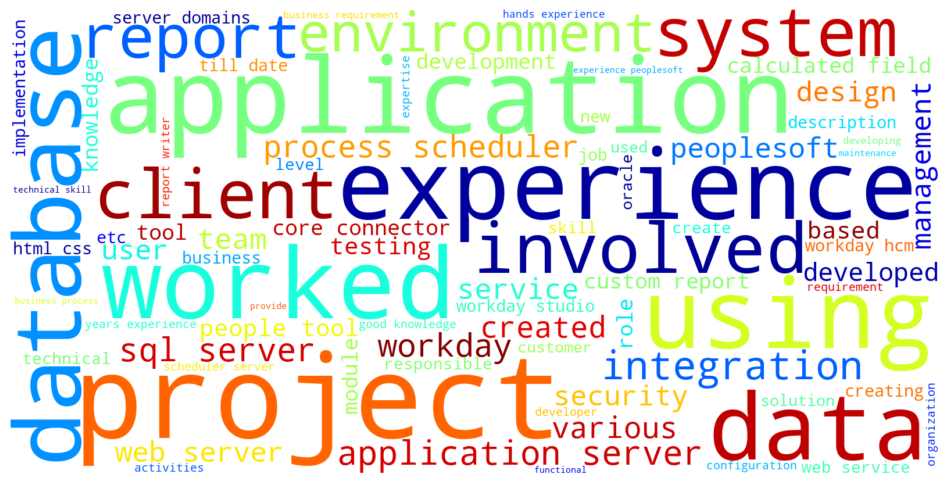

In [45]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(data['Absolute_Clean_Resumes'][:5000])


In [46]:
categories = np.sort(data['text'].unique())
categories

array(['PeopleSoft', 'React JS Developer', 'SQL Developer', 'Workday'],
      dtype=object)

In [47]:
data_categories = [data[data['text'] == category].loc[:, ['Absolute_Clean_Resumes', 'text']] for category in categories]
data_categories

[                               Absolute_Clean_Resumes        text
 0   anubhav kumar singh core competencies scriptin...  PeopleSoft
 1   profile summary years experience implementing ...  PeopleSoft
 2   peoplesoft database administrator gangareddy p...  PeopleSoft
 3   classification internal classification interna...  PeopleSoft
 4   priyanka ramadoss mountpleasant coonoor nilgir...  PeopleSoft
 5   sirazuddin bangalore india sirazuddin bangalor...  PeopleSoft
 6   peoplesoft administrator srinivas experience s...  PeopleSoft
 7   peoplesoft admin varkala vikas career objectiv...  PeopleSoft
 8   vinod akkala peoplesoft dba admin professional...  PeopleSoft
 9   peoplesoft admin peoplesoft dba ganesh alladi ...  PeopleSoft
 10  peoplesoft administration vivekanand sayana ca...  PeopleSoft
 11  arun venu experience summary experience years ...  PeopleSoft
 12  personal details name pritam biswas date birth...  PeopleSoft
 13  rahul ahuja summary years experience peoplesof...  People

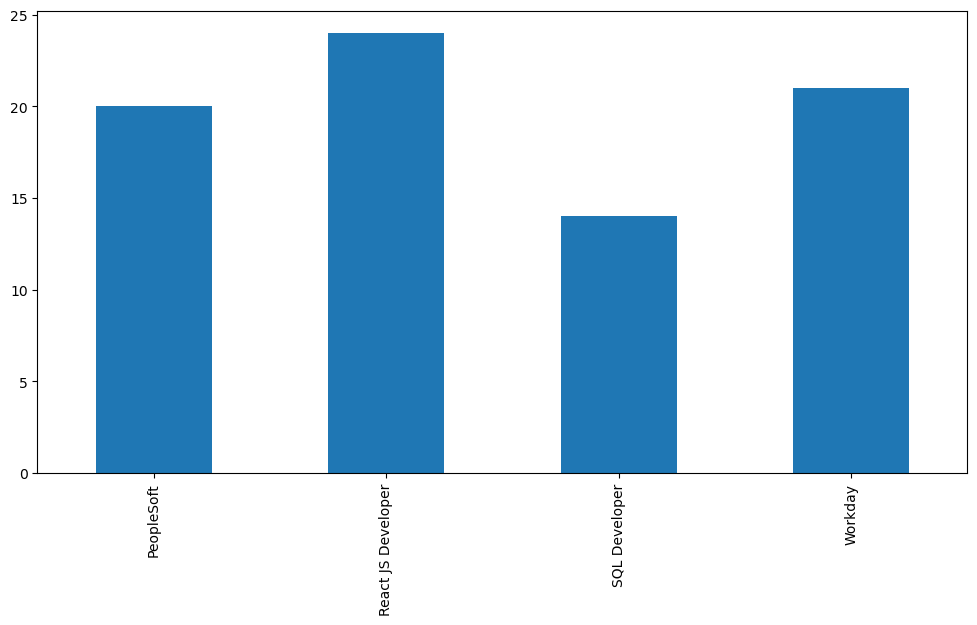

In [48]:
data['text'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [49]:
def wordcloud(df):
    txt = ' '.join(txt for txt in data['Absolute_Clean_Resumes'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

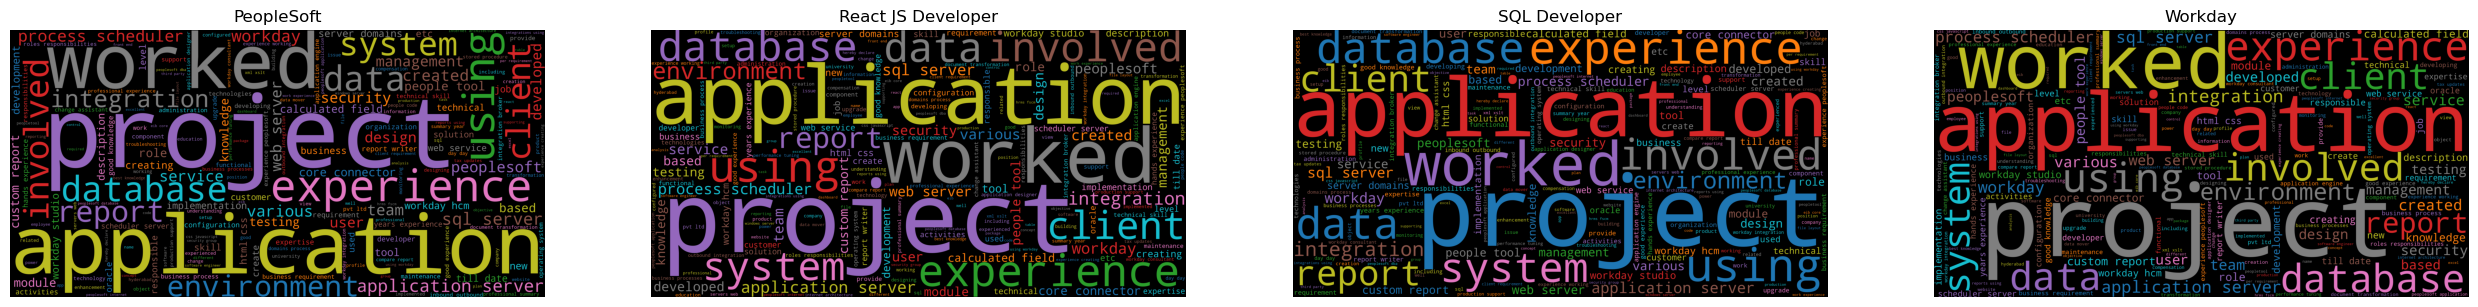

In [50]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline
plt.figure(figsize=(40, 28))

for i, category in enumerate(categories):
    wc = wordcloud(data_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [51]:
def wordfreq(df):
    count = data['Absolute_Clean_Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

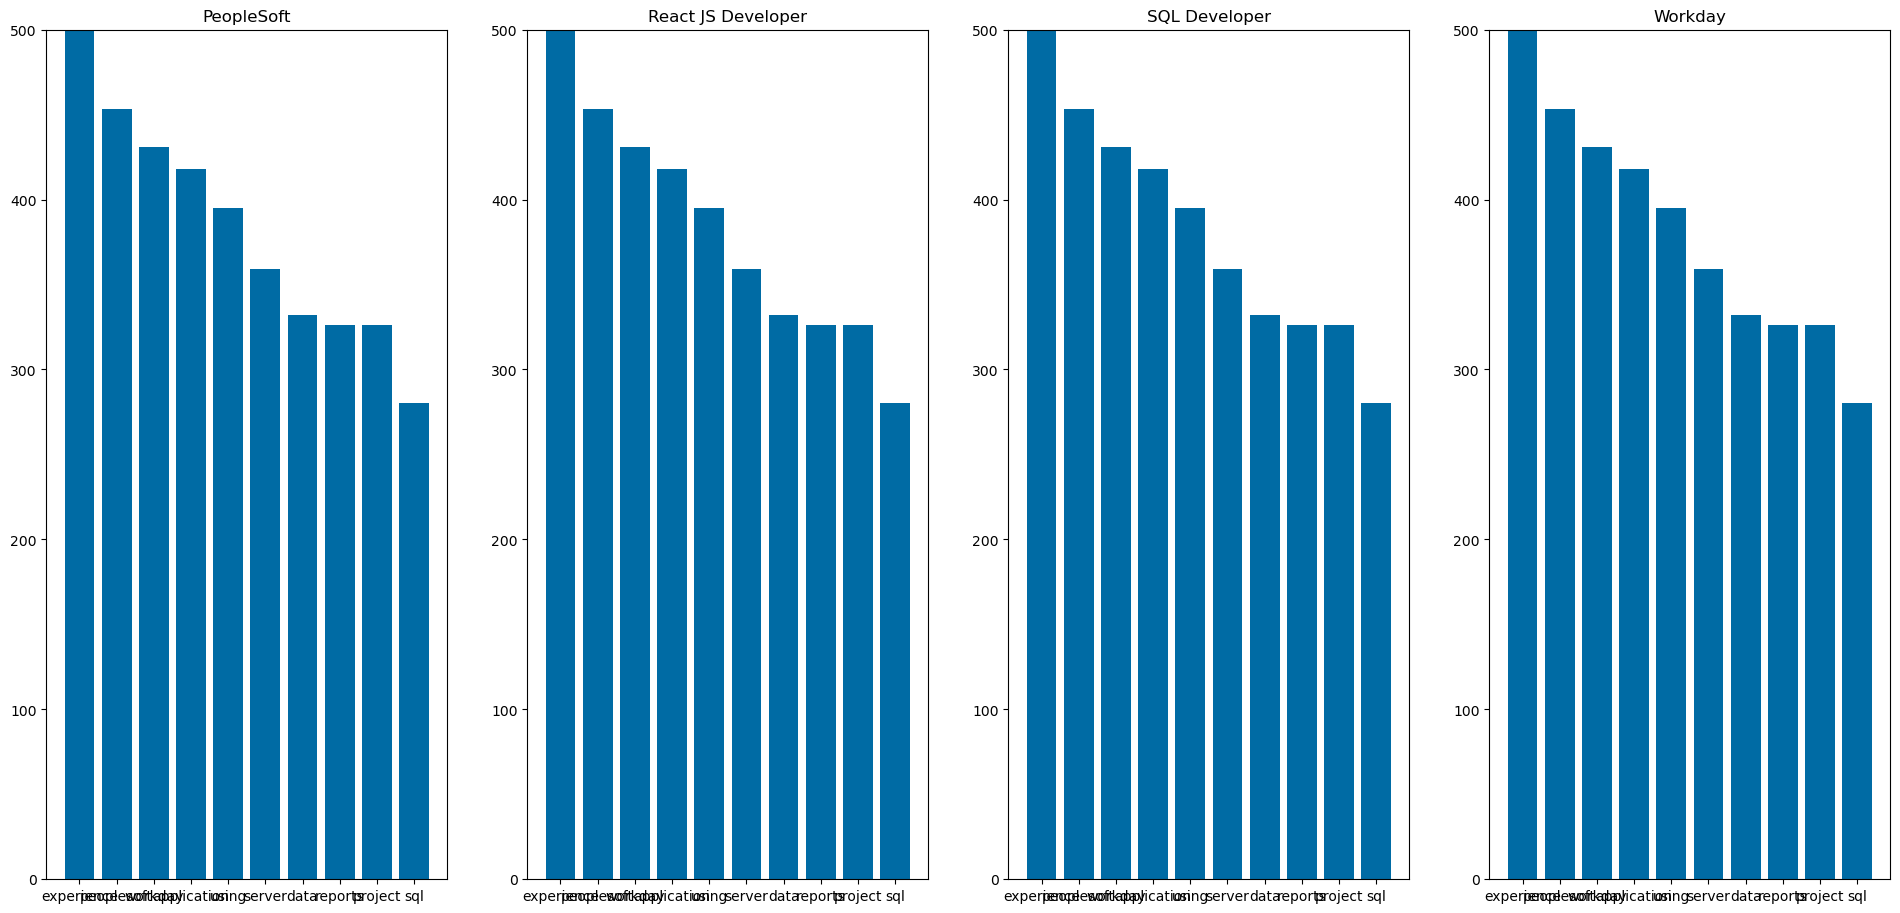

In [52]:
fig = plt.figure(figsize=(30, 64))

for i, category in enumerate(categories):
    wf = wordfreq(data_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 500)

plt.show()
plt.close()

In [53]:
data

,text,Absolute_Clean_Resumes
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,profile summary years experience implementing ...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,srikanth workday hcm consultant seeking suitab...
76,Workday,workday hcm fcm name kumar role workday consul...
77,Workday,venkateswarlu workday consultant years experie...


In [54]:
data.text.value_counts()

React JS Developer    24
Workday               21
PeopleSoft            20
SQL Developer         14
Name: text, dtype: int64

In [55]:
print ("Different categories of resume -")
print (data.text.unique())

Different categories of resume -
['PeopleSoft' 'React JS Developer' 'SQL Developer' 'Workday']


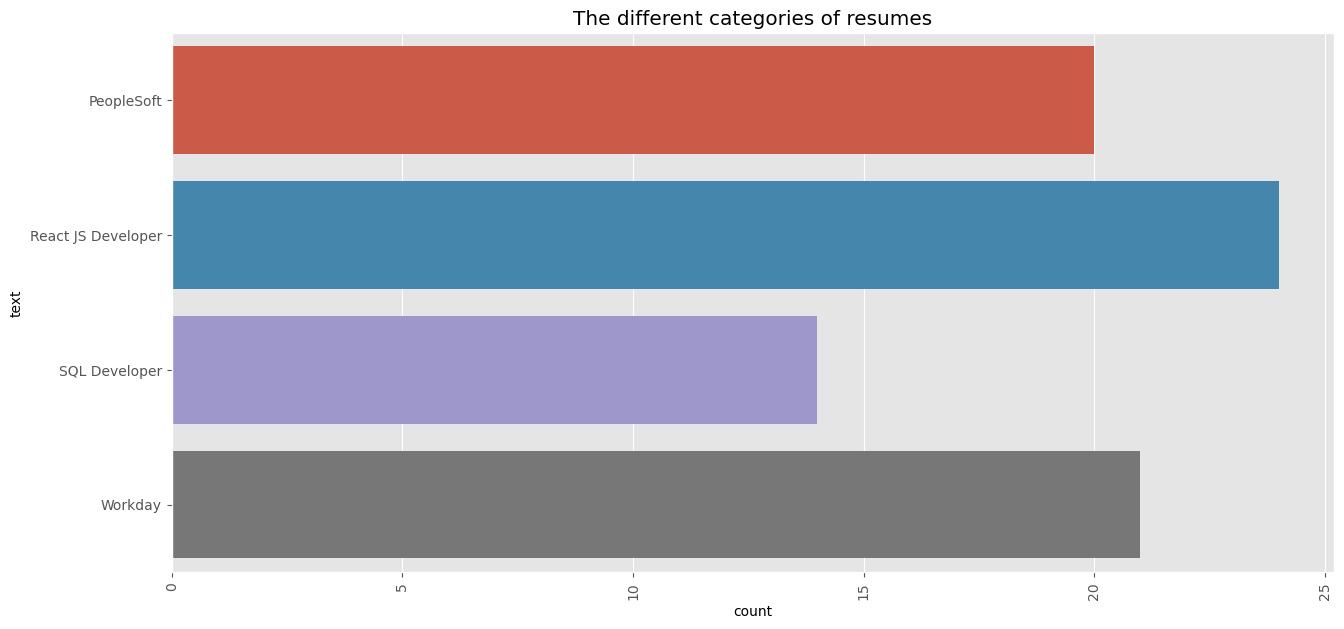

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.title("The different categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="text", data=data,color=None)
plt.show()

In [57]:
targetCounts = data['text'].value_counts().reset_index()['text']
targetLabels  = data['text'].value_counts().reset_index()['index']

In [58]:
targetCounts

0    24
1    21
2    20
3    14
Name: text, dtype: int64

In [59]:
targetLabels

0    React JS Developer
1               Workday
2            PeopleSoft
3         SQL Developer
Name: index, dtype: object

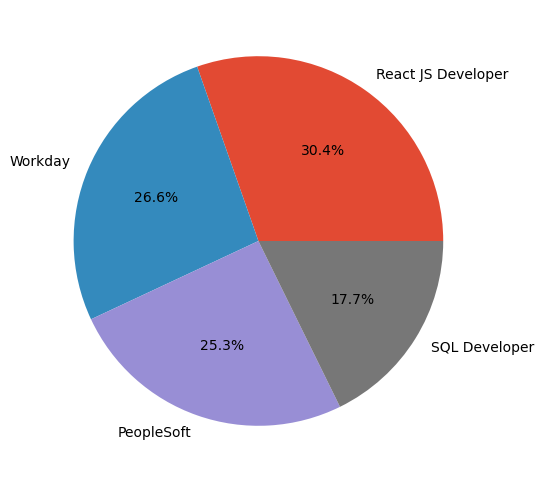

In [60]:
## Calculate percentage for each category
plt.figure(figsize=(8,6))
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%')
plt.show()

## Labeling

In [47]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [49]:
data["Encoded_Skill"]=le_encoder.fit_transform(data["text"])
data

,text,Absolute_Clean_Resumes,Encoded_Skill
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,0
1,PeopleSoft,profile summary years experience implementing ...,0
2,PeopleSoft,peoplesoft database administrator gangareddy p...,0
3,PeopleSoft,classification internal classification interna...,0
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...,0
...,...,...,...
74,Workday,workday integration consultant name sri krishn...,3
75,Workday,srikanth workday hcm consultant seeking suitab...,3
76,Workday,workday hcm fcm name kumar role workday consul...,3
77,Workday,venkateswarlu workday consultant years experie...,3


In [52]:
data.isna().sum()
data.describe()

,Encoded_Skill
count,79.000000
mean,1.455696
std,1.141271
min,0.000000
25%,0.500000
50%,1.000000
75%,3.000000
max,3.000000


## Vectorization

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
requiredText = data["Absolute_Clean_Resumes"].values
requiredTarget = data["Encoded_Skill"].values

In [54]:
word_vectorizer = TfidfVectorizer(smooth_idf=True,analyzer='word',ngram_range=(1,3),
    sublinear_tf=True,
    stop_words='english',
    max_features=5000)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,shuffle = True,random_state=20, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(55, 5000)
(24, 5000)


## TF-IDF

In [ ]:
word_vectorizer = TfidfVectorizer(smooth_idf=True,analyzer='word',ngram_range=(1,3),
    sublinear_tf=True,
    stop_words='english',
    max_features=5000)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,shuffle = True,random_state=20, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

In [55]:
X_train.shape,y_train.shape

((55, 5000), (55,))

In [56]:
print("X_train:\n",X_train)
print("---------------------------------------------")
print("X_test:\n",X_test)

X_train:
   (0, 4990)	0.033284499955107294
  (0, 4989)	0.02561107029693408
  (0, 4923)	0.05727872245083557
  (0, 4822)	0.051277668434972445
  (0, 4754)	0.13392115120466047
  (0, 4735)	0.07909598925733735
  (0, 4713)	0.054094188178644906
  (0, 4694)	0.06784215877958509
  (0, 4638)	0.045960157260598676
  (0, 4626)	0.049945342309794055
  (0, 4575)	0.06784215877958509
  (0, 4572)	0.0537016879605652
  (0, 4567)	0.04221716773643829
  (0, 4528)	0.04855499638918398
  (0, 4527)	0.04855499638918398
  (0, 4526)	0.04291661281534307
  (0, 4459)	0.07909598925733735
  (0, 4457)	0.06206209838643244
  (0, 4448)	0.054094188178644906
  (0, 4437)	0.04679160195235575
  (0, 4429)	0.07275816060459167
  (0, 4403)	0.034706326782846415
  (0, 4365)	0.05489282504192967
  (0, 4359)	0.03520141884233536
  (0, 4352)	0.02988845727812339
  :	:
  (54, 1091)	0.05028033464060013
  (54, 1090)	0.0662366083606495
  (54, 1089)	0.05815314526364483
  (54, 1088)	0.05594449393949553
  (54, 1049)	0.06787482045544398
  (54, 1048)	0

## Model Building

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# SVM

In [58]:
svm = OneVsRestClassifier(SVC(C=1.0,kernel='linear',degree=3,gamma='scale',class_weight ='balanced'))
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)
print("SVM Classification Train Accuracy: {}%".format(round(svm.score(X_train,y_train)*100,2)))
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(X_test,y_test)*100,2)))
svm_cm = confusion_matrix(y_test, svm_prediction)

print("Classification Report:\n")

print(classification_report(y_test, svm_prediction))

SVM Classification Train Accuracy: 100.0%
SVM Classification Test Accuracy: 100.0%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [59]:
clf =MultinomialNB(alpha=1, fit_prior=False, class_prior=None).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
nb_score = clf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, prediction)

Accuracy of MultinomialNB Classifier on training set: 1.00
Accuracy of MultinomialNB Classifier on test set: 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




# Decision Tree

In [60]:
dt = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",splitter='best',max_depth=None)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt.score(X_train,y_train)*100,2)))
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)

print("Classification Report:\n")

print(classification_report(y_test, dt_prediction))

Decision Tree Classification Train Accuracy: 100.0%
Decision Tree Classification Test Accuracy: 79.17%
Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       1.00      0.57      0.73         7
           2       0.75      0.75      0.75         4
           3       0.88      1.00      0.93         7

    accuracy                           0.79        24
   macro avg       0.81      0.79      0.78        24
weighted avg       0.83      0.79      0.79        24



## Random Forest

In [61]:
rf =RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3,max_features='auto',random_state=None,
 class_weight="balanced")
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classification Train Accuracy: {}%".format(round(rf.score(X_train,y_train)*100,2)))
print("Random Forest Classification Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
rf_cm = confusion_matrix(y_test, rf_prediction)
print("Classification Report:\n")
print(classification_report(y_test, rf_prediction))

Random Forest Classification Train Accuracy: 100.0%
Random Forest Classification Test Accuracy: 100.0%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



## KNeighbors

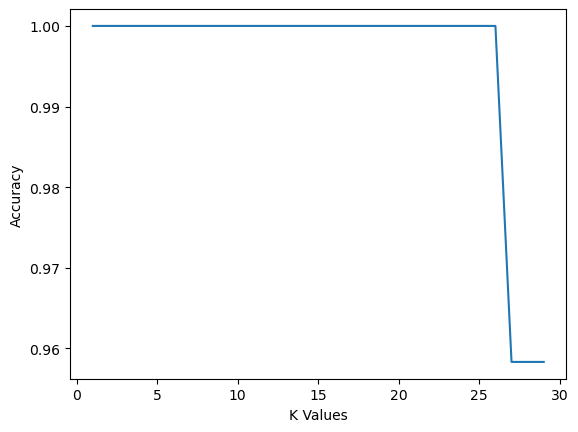

In [79]:
score_list = []
for each in range(1,30):
    knn2 =OneVsRestClassifier(KNeighborsClassifier(n_neighbors=each, weights='uniform',p=2,metric='minkowski',algorithm='brute'))
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))
    knn_cm = confusion_matrix(y_test, prediction)
plt.plot(range(1,30), score_list)

plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

## Navie Bayes Classifier

In [63]:
clf =MultinomialNB(alpha=1, fit_prior=False, class_prior=None).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
nb_score = clf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, prediction)

Accuracy of MultinomialNB Classifier on training set: 1.00
Accuracy of MultinomialNB Classifier on test set: 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24




## Hyper Parameter Twerking
### Grid search CV

In [64]:
from sklearn.model_selection import GridSearchCV

grid_search_ = GridSearchCV(estimator =rf,param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                              cv=5)
grid_search_.fit(X_train,y_train)
print(grid_search_.best_params_)
print(grid_search_.best_score_)

{'criterion': 'gini', 'max_depth': 4}
1.0


In [65]:
train_accuracy_1=[]
test_accuracy_1=[]
for depth in range(1,10):
    model_2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth,max_features='auto',random_state=None,
 class_weight="balanced")
    model_2.fit(X_train,y_train)
    train_accuracy_1.append(model_2.score(X_train,y_train))
    test_accuracy_1.append(model_2.score(X_test,y_test))

Text(0, 0.5, 'performance')

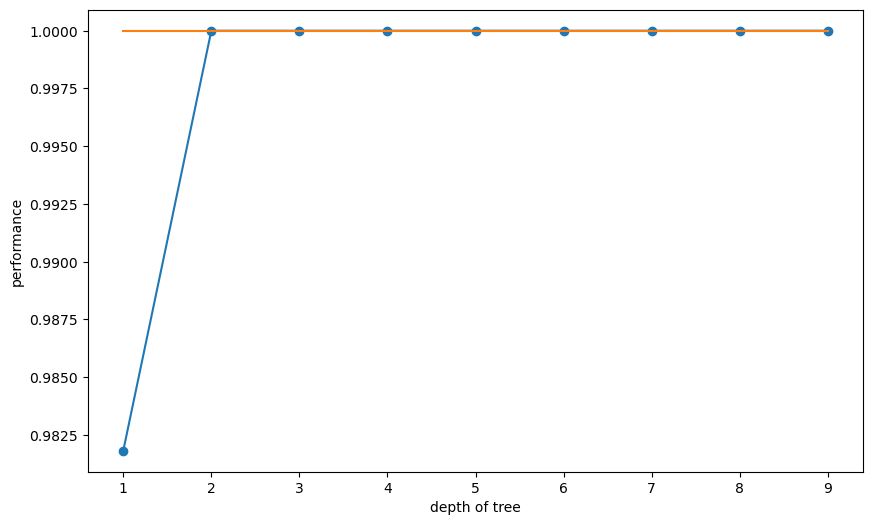

In [66]:
frame_1=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy_1,'test_acc':test_accuracy_1})
plt.figure(figsize=(10,6))
plt.plot(frame_1["max_depth"],frame_1["train_acc"],marker='o')
plt.plot(frame_1["max_depth"],frame_1["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

## Adaboost Classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)
ab_score= ab_clf.score(X_test, y_test)
ab_prediction = ab_clf.predict(X_test)
print("AdaBoost Classifier Train Accuracy: {}%".format(round(ab_clf.score(X_train,y_train)*100,2)))
print("AdaBoost Classifier Test Accuracy: {}%".format(round(ab_clf.score(X_test,y_test)*100,2)))      
ab_cm = confusion_matrix(y_test, ab_prediction)
print("Classification Report:\n")
print(classification_report(y_test, ab_prediction))

AdaBoost Classifier Train Accuracy: 74.55%
AdaBoost Classifier Test Accuracy: 70.83%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.50      1.00      0.67         7
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         7

    accuracy                           0.71        24
   macro avg       0.62      0.69      0.63        24
weighted avg       0.60      0.71      0.63        24



## Gradient Boosting Classifier

In [68]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_score=gb_clf.score(X_test, y_test)
gb_prediction = gb_clf.predict(X_test)
print("Gradient Boosting Classifier Train Accuracy: {}%".format(round(gb_clf.score(X_train,y_train)*100,2)))
print("Gradient Boosting Classifier Test Accuracy: {}%".format(round(gb_clf.score(X_test,y_test)*100,2)))      
gb_cm = confusion_matrix(y_test, gb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, gb_prediction))

Gradient Boosting Classifier Train Accuracy: 100.0%
Gradient Boosting Classifier Test Accuracy: 100.0%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [69]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 1.3 MB/s eta 0:00:00


In [70]:
!pip install xgboost

## Xtreme Gradient Boosting Classifier

In [71]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_score=xgb_clf.score(X_test, y_test)
xgb_prediction = xgb_clf.predict(X_test)
print("Xtreme Gradient Boosting Classifier Train Accuracy: {}%".format(round(xgb_clf.score(X_train,y_train)*100,2)))
print("Xtreme Gradient Boosting Classifier Test Accuracy: {}%".format(round(xgb_clf.score(X_test,y_test)*100,2)))      
xgb_cm = confusion_matrix(y_test, xgb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, xgb_prediction))

Xtreme Gradient Boosting Classifier Train Accuracy: 100.0%
Xtreme Gradient Boosting Classifier Test Accuracy: 100.0%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         7

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [72]:
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
lgb_score=lgb_clf.score(X_test, y_test)
lgb_prediction = lgb_clf.predict(X_test)
print("Light Gradient Boosting Classifier Train Accuracy: {}%".format(round(lgb_clf.score(X_train,y_train)*100,2)))
print("Light Gradient Boosting Classifier Test Accuracy: {}%".format(round(lgb_clf.score(X_test,y_test)*100,2)))      
lgb_cm = confusion_matrix(y_test, lgb_prediction)
print("Classification Report:\n")
print(classification_report(y_test, lgb_prediction))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1376
[LightGBM] [Info] Number of data points in the train set: 55, number of used features: 122
[LightGBM] [Info] Start training from score -1.368276
[LightGBM] [Info] Start training from score -1.174120
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -1.368276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [73]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [81]:
TN = [knn_cm[0,0], svm_cm[0,0], nb_cm[0,0], dt_cm[0,0], rf_cm[0,0], ab_cm[0,0], gb_cm[0,0], xgb_cm[0,0], lgb_cm[0,0]]
FP = [knn_cm[0,1], svm_cm[0,1], nb_cm[0,1], dt_cm[0,1], rf_cm[0,1], ab_cm[0,1], gb_cm[0,1], xgb_cm[0,1], lgb_cm[0,1]]
FN = [knn_cm[1,0], svm_cm[1,0], nb_cm[1,0], dt_cm[1,0], rf_cm[1,0], ab_cm[1,0], gb_cm[1,0], xgb_cm[1,0], lgb_cm[1,0]]
TP = [knn_cm[1,1], svm_cm[1,1], nb_cm[1,1], dt_cm[1,1], rf_cm[1,1], ab_cm[1,1], gb_cm[1,1], xgb_cm[1,1], lgb_cm[1,1]]
Accuracy = [nb_score, svm_score, nb_score, dt_score, rf_score, ab_score, gb_score, xgb_score, lgb_score]
Classification = ["KNN Classification", "SVM Classification", "Naive Bayes Classification", 
                  "Decision Tree Classification", "Random Forest Classification","AdaBoost Classifier","GradientBoosting Classifier",
                   "Xtreme Gradient Boosting Classifier", "Light Gradient Boosting Classifier"]
list_matrix = [Classification, TN, FP, FN, TP, Accuracy]
list_headers = ["Model", "TN", "FP", "FN", "TP", "Accuracy"]
zipped = list(zip(list_headers, list_matrix))
data_dict = dict(zipped)
df_1=pd.DataFrame(data_dict)

In [82]:
df_1

,Model,TN,FP,FN,TP,Accuracy
0,KNN Classification,6,0,0,7,1.000000
1,SVM Classification,6,0,0,7,1.000000
2,Naive Bayes Classification,6,0,0,7,1.000000
3,Decision Tree Classification,5,0,2,4,0.791667
4,Random Forest Classification,6,0,0,7,1.000000
5,AdaBoost Classifier,0,6,0,7,0.708333
6,GradientBoosting Classifier,6,0,0,7,1.000000
7,Xtreme Gradient Boosting Classifier,6,0,0,7,1.000000
8,Light Gradient Boosting Classifier,6,0,0,7,1.000000


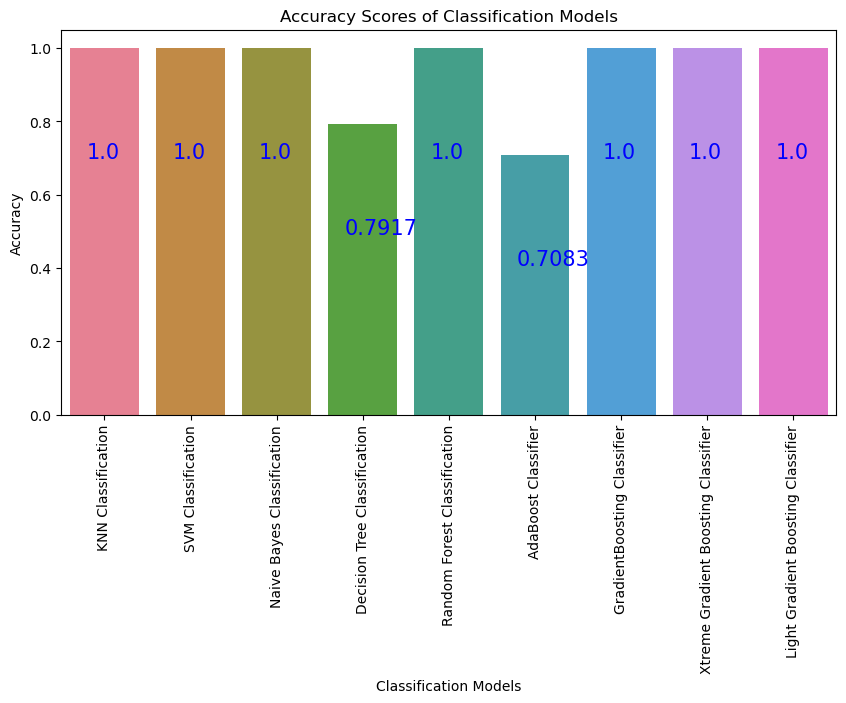

In [84]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x=df_1.Model, y=df_1.Accuracy, palette =sns.color_palette("husl", 9) )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.style.use('seaborn-dark-palette')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()
#sns.cubehelix_palette(len(df_1.Model)

## Model Deployment


In [88]:
import pickle
filename = 'modelDT.pkl'
pickle.dump(dt_cm ,open(filename,'wb'))


In [89]:
import pickle
filename = 'vector.pkl'
pickle.dump(WordFeatures,open(filename,'wb'))